<h1>Salary predictions</h1> 05/04/23

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/salary_data.csv')

In [5]:
df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
df.shape

(30, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
df.shape[0]

30

In [12]:
df.shape[1]

2

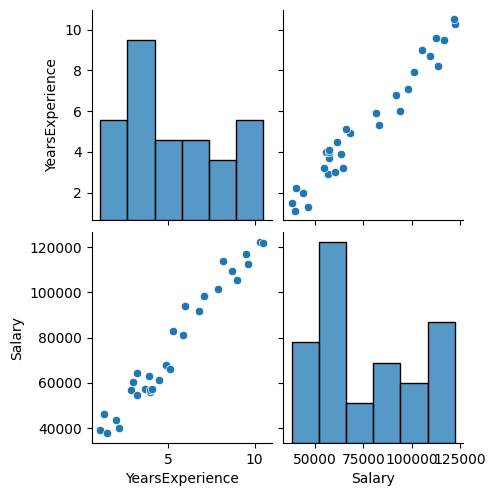

In [14]:
/content/drive/MyDrive/Colab Notebooks/dataset/headbrain.csv

In [15]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

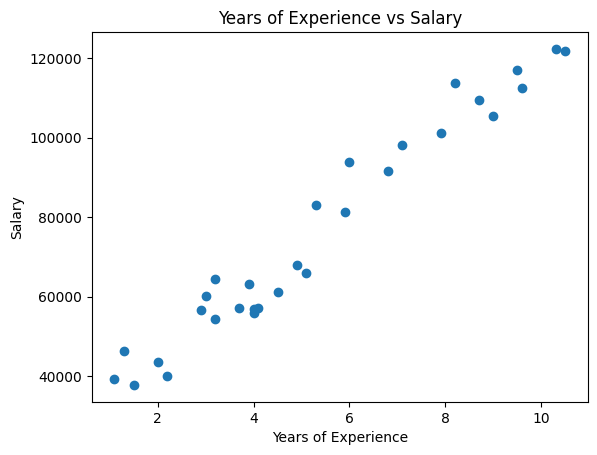

In [17]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

In [18]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


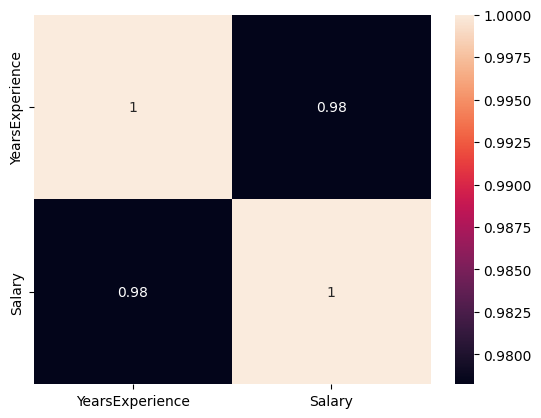

In [20]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [24]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [25]:
df.Salary.isnull().sum()

0

In [ ]:
x = df["YearsExperience"]
y = df["Salary"]

In [26]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

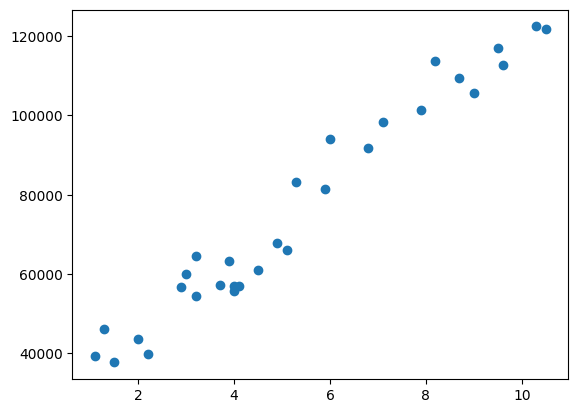

In [28]:
plt.scatter(x,y)
plt.show()

<b>Train Test Split</b>

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [36]:
print(x_train)

[[ 9.5]
 [ 2. ]
 [ 8.7]
 [ 7.9]
 [ 8.2]
 [ 2.2]
 [ 1.5]
 [ 9. ]
 [ 3. ]
 [ 5.9]
 [ 4.1]
 [ 3.2]
 [ 9.6]
 [ 1.3]
 [ 5.1]
 [ 1.1]
 [ 4.9]
 [10.5]
 [10.3]
 [ 3.7]
 [ 3.2]
 [ 4. ]
 [ 4. ]
 [ 2.9]]


In [37]:
x_train.shape

(24, 1)

In [38]:
print(x_test)

[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]]


In [39]:
x_test.shape

(6, 1)

In [40]:
print(y_train)

[116969.  43525. 109431. 101302. 113812.  39891.  37731. 105582.  60150.
  81363.  57081.  54445. 112635.  46205.  66029.  39343.  67938. 121872.
 122391.  57189.  64445.  56957.  55794.  56642.]


In [41]:
y_train.shape

(24,)

In [42]:
print(y_test)

[83088. 98273. 63218. 93940. 61111. 91738.]


In [43]:
y_test.shape

(6,)

<h1>Linear Regression</h1>

In [44]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)
y_test_pred = regr.predict(x_test)

In [45]:
y_train_pred = regr.predict(x_train)

In [46]:
print(y_test_pred)

[75074.50510972 91873.8056381  62008.38247653 81607.56642631
 67608.14931932 89073.92221671]


In [47]:
print(y_train_pred)

[114272.87300929  44275.78747434 106806.51721889  99340.1614285
 102140.0448499   46142.37642194  39609.31510534 109606.40064029
  53608.73221233  80674.27195251  63874.97142412  55475.32115993
 115206.16748308  37742.72615775  73207.91616212  35876.13721015
  71341.32721452 123605.81774728 121739.22879968  60141.79352893
  55475.32115993  62941.67695033  62941.67695033  52675.43773853]


In [48]:
print(regr.coef_)

[9332.94473799]


In [49]:
print(regr.intercept_)

25609.89799835482


<b>y = mx + h</b><br>
salary = regr.coef_ * yearsExperience + regr.intercept_

In [53]:
y = 9332.94473799 * x + 25609.89799835482

In [54]:
print(y)

[[ 35876.13721014]
 [ 37742.72615774]
 [ 39609.31510534]
 [ 44275.78747433]
 [ 46142.37642193]
 [ 52675.43773853]
 [ 53608.73221232]
 [ 55475.32115992]
 [ 55475.32115992]
 [ 60141.79352892]
 [ 62008.38247652]
 [ 62941.67695031]
 [ 62941.67695031]
 [ 63874.97142411]
 [ 67608.14931931]
 [ 71341.32721451]
 [ 73207.9161621 ]
 [ 75074.5051097 ]
 [ 80674.2719525 ]
 [ 81607.56642629]
 [ 89073.92221669]
 [ 91873.80563808]
 [ 99340.16142848]
 [102140.04484987]
 [106806.51721887]
 [109606.40064026]
 [114272.87300926]
 [115206.16748306]
 [121739.22879965]
 [123605.81774725]]


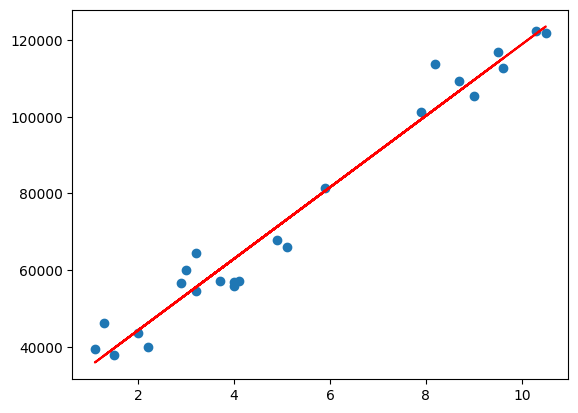

In [62]:
#scatter plot of y_train, x_train
plt.scatter(x_train, y_train)
plt.plot(x_train, regr.coef_[0] * x_train + regr.intercept_ , color = 'r')  #regression line (prediction of train)
plt.show()

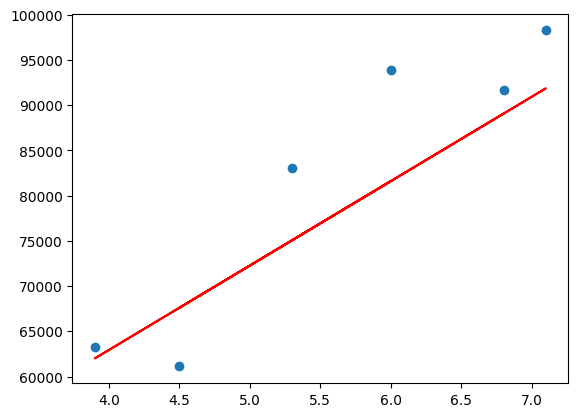

In [61]:
#scatter plot of x_test, y_test
plt.scatter(x_test, y_test)
plt.plot(x_test, regr.coef_[0] * x_test + regr.intercept_ , color = 'r')  #regression line (prediction of test)
plt.show()

In [57]:
regr.coef_[0]

9332.94473799272

In [65]:
#prediction on the given model
new_pred = regr.predict(np.array([3]).reshape(1,1))
new_pred

array([53608.73221233])

<h1>Evaluation of model</h1>

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test_pred, y_test))
print(mean_squared_error(y_test_pred, y_test))
print(r2_score(y_test_pred, y_test))

6185.994575326634
51338023.49224842
0.5601577365529888


In [79]:
print(mean_absolute_error(y_train_pred, y_train))
print(mean_squared_error(y_train_pred, y_train))
print(r2_score(y_train_pred, y_train))

4308.462355212355
27195569.380479943
0.9666814746254523


In [81]:
print(np.sqrt(mean_squared_error(y_train_pred, y_train)))
print(np.sqrt(mean_squared_error(y_test_pred, y_test)))

5214.937140606773
7165.055721503387
